In [16]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
con = duckdb.connect("c:/Code/Local Code/deadlock_match_prediction/data/deadlock.db")

In [58]:
con.close()

In [2]:
df = con.execute("SELECT * FROM player_matches LIMIT 10").fetchdf()

In [3]:
response = con.execute("""SELECT 
    account_id,
    COUNT(DISTINCT match_id) AS match_count
FROM 
    player_matches
GROUP BY 
    account_id
ORDER BY 
    match_count DESC
LIMIT 25;""").fetchdf()
print(response)

    account_id  match_count
0    483770846          527
1    112724001          490
2    130174860          441
3   1425284998          433
4     87241154          422
5   1710092569          379
6    385814004          369
7    356216207          363
8   1444662928          355
9    183271415          335
10   165560339          334
11   137322787          326
12   178797479          325
13  1379380193          324
14  1012333396          322
15   219255558          312
16   289323388          301
17   298155885          300
18    97652111          298
19    34928102          298
20  1192612644          298
21   407786402          297
22   205525871          297
23   204288555          294
24   244471627          292


In [ ]:
response = con.execute("""SELECT 
    match_count,
    COUNT(*) AS player_count
FROM (
    SELECT 
        account_id,
        COUNT(DISTINCT match_id) AS match_count
    FROM 
        player_matches
    GROUP BY 
        account_id
) t
GROUP BY 
    match_count
ORDER BY 
    match_count;""").fetchdf()
print(response)

In [ ]:
response = con.execute("""
        SELECT 
            pm.account_id,
            COUNT(DISTINCT pm.match_id) AS match_count,
            MAX(m.start_time) AS match_time
        FROM 
            player_matches pm
        JOIN
            matches m ON pm.match_id = m.match_id
        GROUP BY 
            pm.account_id
        HAVING 
            match_count > 10
        ORDER BY
            match_time DESC
        LIMIT 5
        """).fetchdf()
print(response)

In [3]:
df = con.execute("""
    SELECT *
    FROM player_trends
                 limit 25
""").fetchdf()
print(df)

    account_id  p_average_kills  p_average_deaths  p_avg_kd  p_total_matches  \
0     15763789             9.09              7.52      1.21             1424   
1     10258152            10.19              6.29      1.62              791   
2    835851102             9.39              5.10      1.84              724   
3   1668944095             7.68              6.72      1.14              556   
4   1379380193             8.07              6.90      1.17             1859   
5    445400791             8.21              7.26      1.13              975   
6    316441186             6.53              6.59      0.99             2458   
7     66649287             9.01              5.07      1.78             2669   
8   1250845755             7.34              5.64      1.30             1249   
9    136898005             7.89              5.63      1.40             1587   
10   836484910             8.40              6.54      1.29             2099   
11   900220895             6.26         

In [47]:
df = con.execute("""
    SELECT mode(p_v_h_kd_pct),
    FROM player_rolling_stats
    group by account_id
    limit 25
""").fetchdf()
print(df)

    "mode"(p_v_h_kd_pct)
0                  -15.0
1                  -12.0
2                   35.0
3                   52.0
4                   92.0
5                   50.0
6                   -5.0
7                  -65.0
8                   72.0
9                   -5.0
10                 380.0
11                 -27.0
12                 -23.0
13                   5.0
14                   9.0
15                  77.0
16                 109.0
17                 125.0
18                 -11.0
19                 -19.0
20                 -43.0
21                  59.0
22                 -31.0
23                 -24.0
24                  23.0


In [12]:
query = """
SELECT 
    account_id,
    p_avg_kd,
    p_total_matches,
    p_win_rate,
    p_win_streak_avg,
    p_loss_streak_avg,
    win_streaks_2plus,
    win_streaks_3plus,
    win_streaks_4plus,
    loss_streaks_2plus,
    loss_streaks_3plus,
    loss_streaks_4plus,
    win_streaks_5plus,
    loss_streaks_5plus,
FROM player_trends
WHERE p_total_matches > 501
AND p_total_matches < 3000
LIMIT 25
"""

df = con.execute(query).fetchdf()
print(df)

    account_id  p_avg_kd  p_total_matches  p_win_rate  p_win_streak_avg  \
0    429795010      1.36             1194   55.029999          2.313380   
1   1150831835      1.43              826   62.110001          2.772973   
2    233893017      0.97              621   52.500000          2.187919   
3   1173747068      1.61              725   53.380001          2.263158   
4    197865966      1.20              532   50.000000          2.062016   
5    392086095      1.13              731   51.439999          2.278788   
6   1477660209      1.27              964   55.810001          2.456621   
7   1062898121      1.41             1625   52.740002          2.116049   
8    130174860      1.37             1309   52.560001          2.143302   
9    272697072      1.05              895   54.299999          2.160000   
10    59536063      1.31              642   53.119999          2.041916   
11   858544160      1.50             1456   48.900002          1.983287   
12   115965224      1.07 

In [13]:
response = con.execute("""
    SELECT count(*)
    FROM player_trends""").fetchdf()
print(response)

   count_star()
0         17253


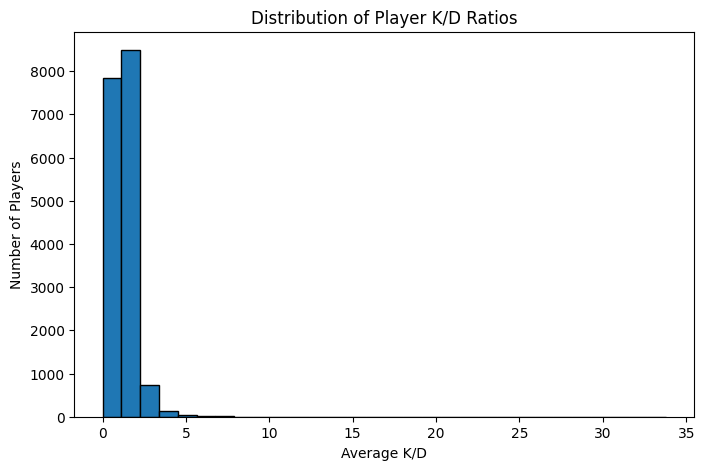

In [11]:
import matplotlib.pyplot as plt
df = con.execute("""
    SELECT *
    FROM player_trends
""").fetchdf()
plt.figure(figsize=(8, 5))
plt.hist(df['p_avg_kd'], bins=30, edgecolor='black')
plt.xlabel("Average K/D")
plt.ylabel("Number of Players")
plt.title("Distribution of Player K/D Ratios")
plt.show()

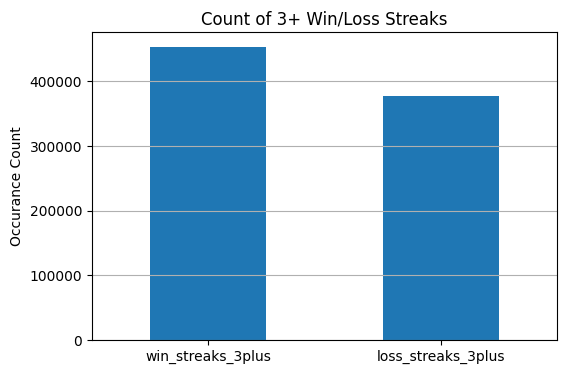

In [20]:
streak_counts = df[['win_streaks_3plus', 'loss_streaks_3plus']].sum()

streak_counts.plot(kind='bar', figsize=(6,4))
plt.title("Count of 3+ Win/Loss Streaks")
plt.ylabel("Occurance Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

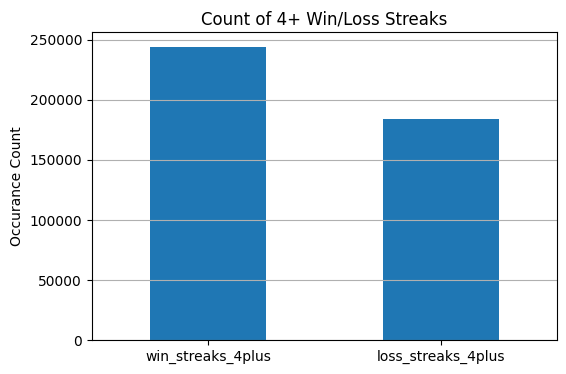

In [21]:
streak_counts = df[['win_streaks_4plus', 'loss_streaks_4plus']].sum()

streak_counts.plot(kind='bar', figsize=(6,4))
plt.title("Count of 4+ Win/Loss Streaks")
plt.ylabel("Occurance Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

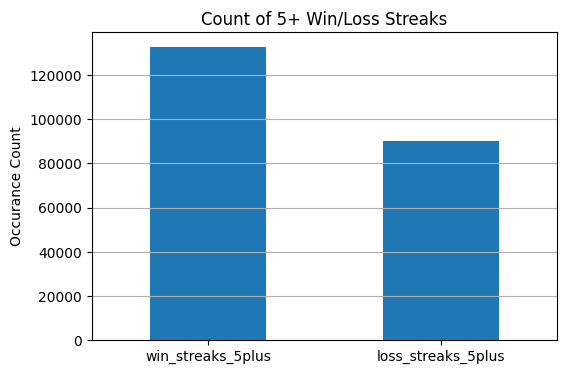

In [22]:
streak_counts = df[['win_streaks_5plus', 'loss_streaks_5plus']].sum()

streak_counts.plot(kind='bar', figsize=(6,4))
plt.title("Count of 5+ Win/Loss Streaks")
plt.ylabel("Occurance Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

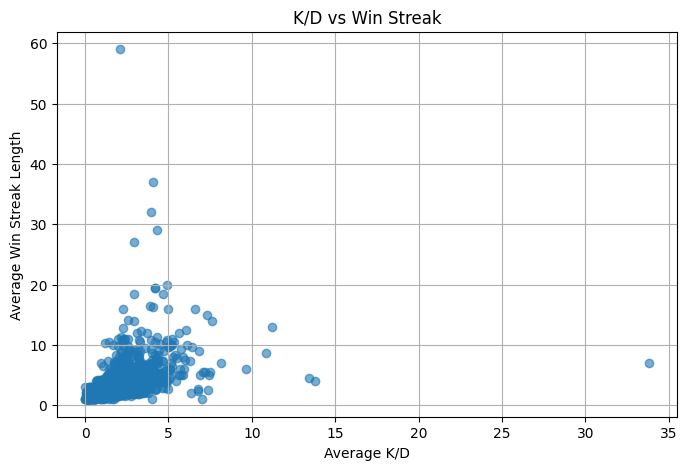

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(df['p_avg_kd'], df['p_win_streak_avg'], alpha=0.6)
plt.xlabel("Average K/D")
plt.ylabel("Average Win Streak Length")
plt.title("K/D vs Win Streak")
plt.grid(True)
plt.show()

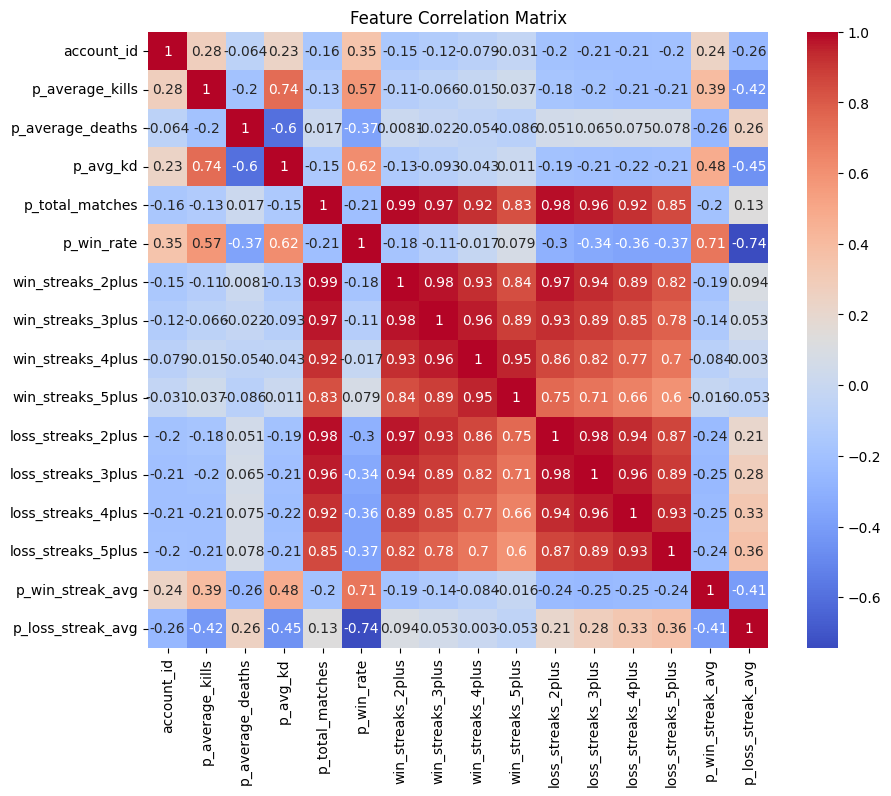

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

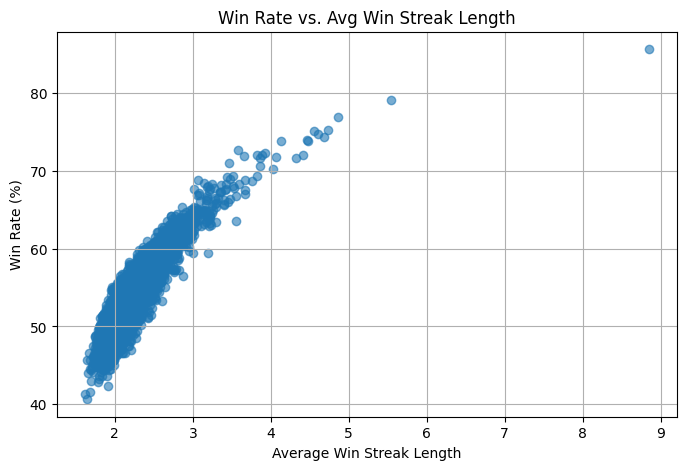

In [26]:
plt.figure(figsize=(8, 5))
plt.scatter(df['p_win_streak_avg'], df['p_win_rate'], alpha=0.6)
plt.xlabel("Average Win Streak Length")
plt.ylabel("Win Rate (%)")
plt.title("Win Rate vs. Avg Win Streak Length")
plt.grid(True)
plt.show()

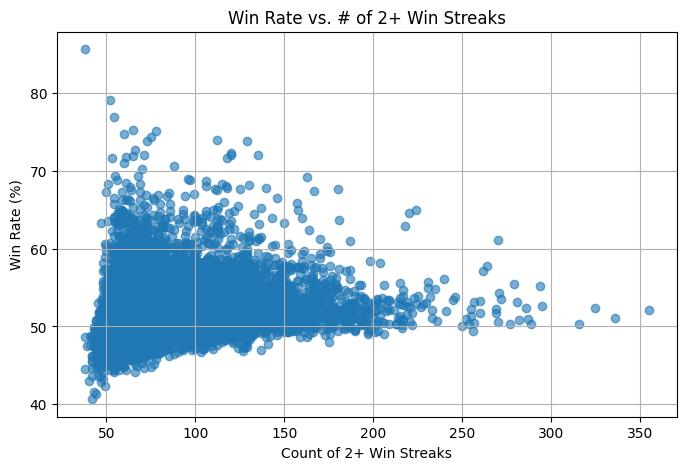

In [27]:
plt.figure(figsize=(8, 5))
plt.scatter(df['win_streaks_2plus'], df['p_win_rate'], alpha=0.6)
plt.xlabel("Count of 2+ Win Streaks")
plt.ylabel("Win Rate (%)")
plt.title("Win Rate vs. # of 2+ Win Streaks")
plt.grid(True)
plt.show()

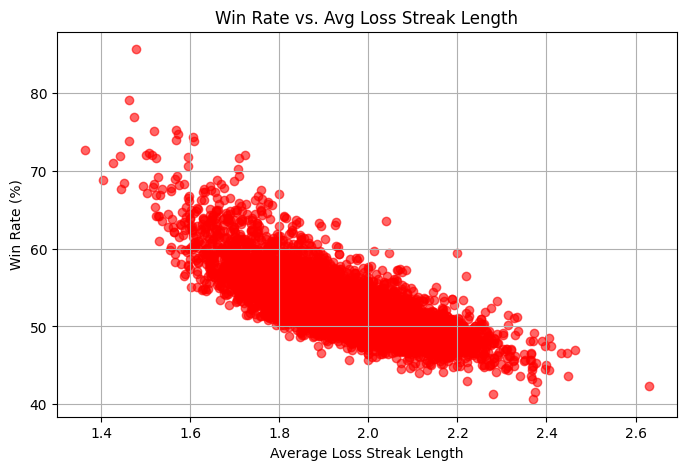

In [28]:
plt.figure(figsize=(8, 5))
plt.scatter(df['p_loss_streak_avg'], df['p_win_rate'], alpha=0.6, color='red')
plt.xlabel("Average Loss Streak Length")
plt.ylabel("Win Rate (%)")
plt.title("Win Rate vs. Avg Loss Streak Length")
plt.grid(True)
plt.show()

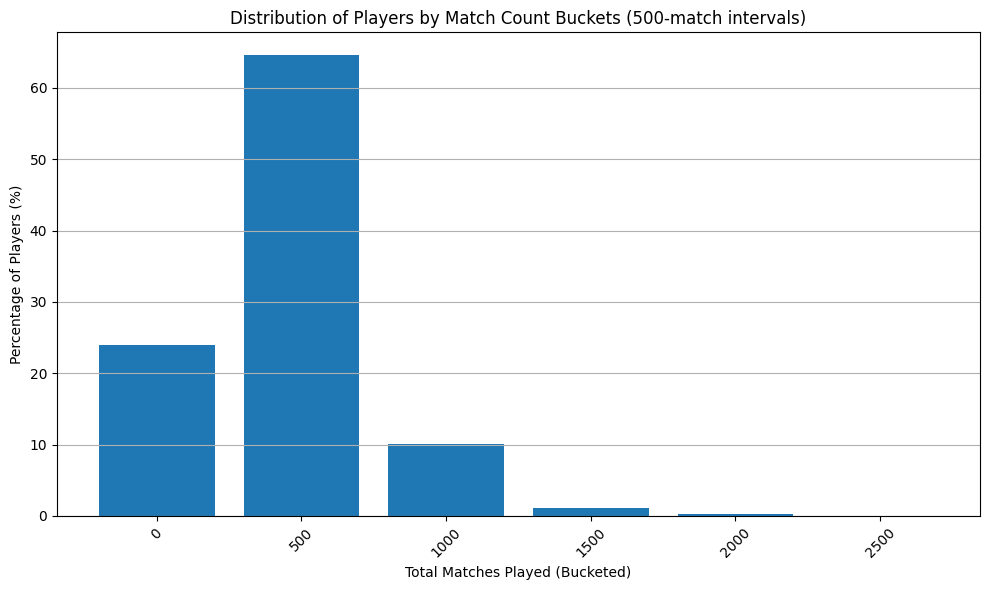

In [29]:
df['match_bucket'] = (df['p_total_matches'] // 500) * 500
bucket_counts = df['match_bucket'].value_counts().sort_index()
bucket_percent = (bucket_counts / len(df)) * 100
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(bucket_percent.index.astype(str), bucket_percent.values)
plt.xlabel("Total Matches Played (Bucketed)")
plt.ylabel("Percentage of Players (%)")
plt.title("Distribution of Players by Match Count Buckets (500-match intervals)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [30]:
roll_df = con.execute("""
    select *
    from player_rolling_stats""").fetchdf()

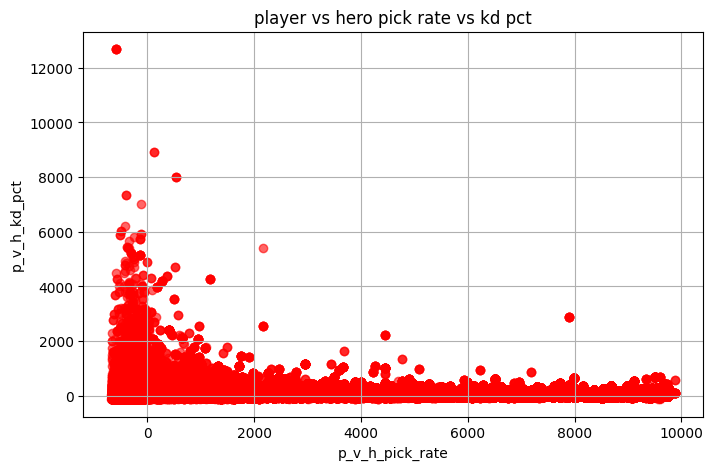

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(roll_df['p_v_h_pick_rate'], roll_df['p_v_h_kd_pct'], alpha=0.6, color='red')
plt.xlabel("p_v_h_pick_rate")
plt.ylabel("p_v_h_kd_pct")
plt.title("player vs hero pick rate vs kd pct")
plt.grid(True)
plt.show()

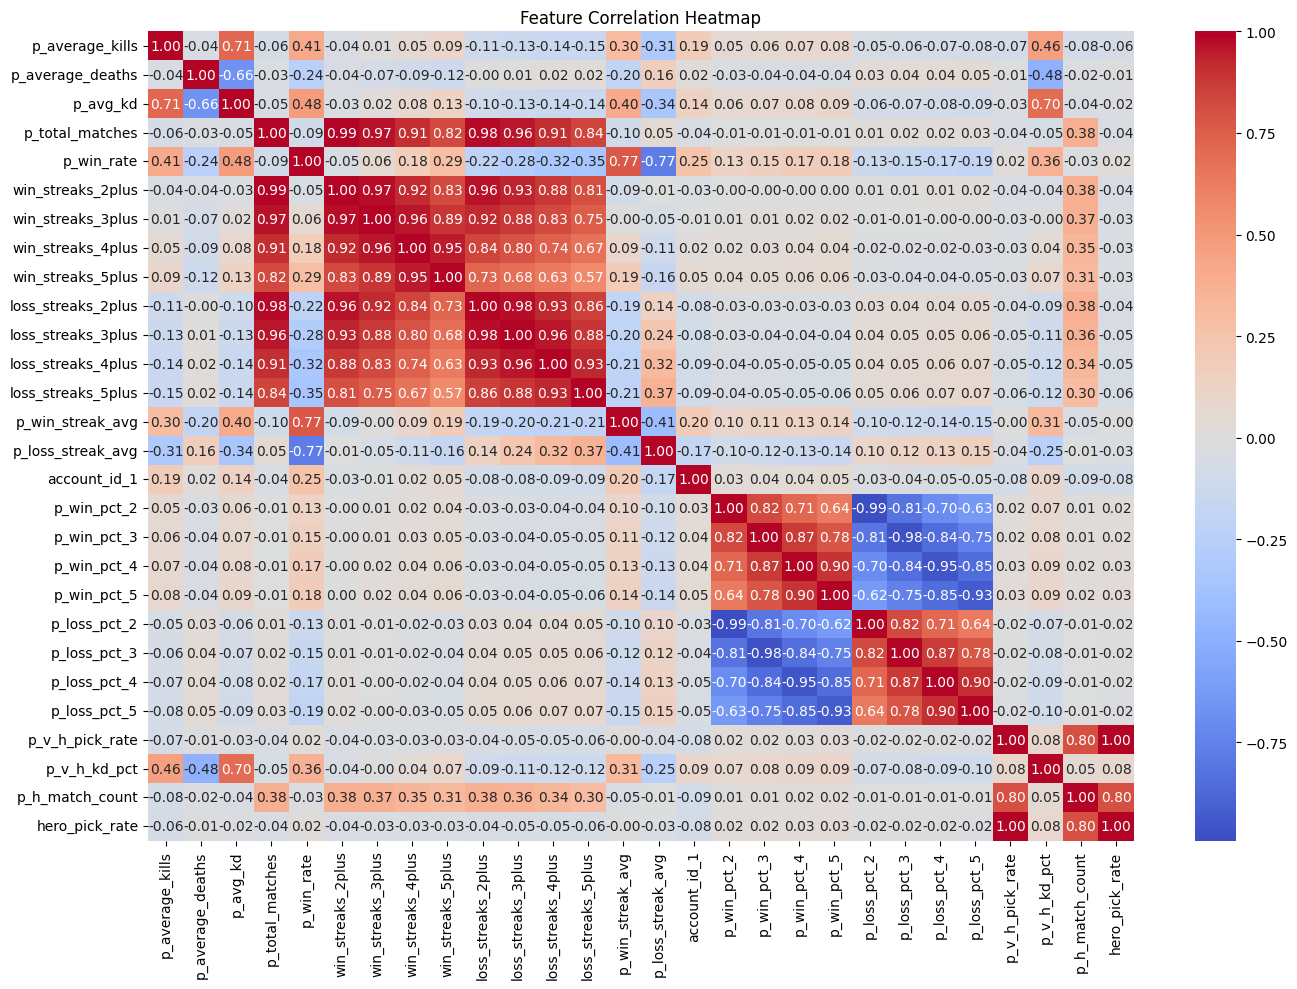

In [56]:
import duckdb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect and query combined dataset
df = con.execute("""
    SELECT 
        pt.*, prs.*
    FROM player_trends pt
    JOIN player_rolling_stats prs
    ON pt.account_id = prs.account_id
    """).fetchdf()

# Drop ID/time fields and non-numeric
drop_cols = ['account_id', 'match_id', 'start_time', 'hero_id', 'prior_win_loss_streak']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Compute correlation
corr = df.corr(numeric_only=True)

# Plot
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [8]:
# 2. Load player overall win rates
df_trends = con.execute("""
    SELECT *
    FROM player_trends
""").df()

# 3. Load match history with team outcome flag
#    (replace table/name if different in your schema)
df_matches = con.execute("""
    SELECT *
    FROM player_matches_history
""").df()

# 4. Merge and compute per‐team average win rate + team outcome
df = df_matches.merge(df_trends, on='account_id', how='left')
df_team = (
    df
    .groupby(['match_id','team'], as_index=False)
    .agg(team_avg_win_rate=('p_win_rate','mean'),
         team_won=('won','max'))  # 1 if this team won
)

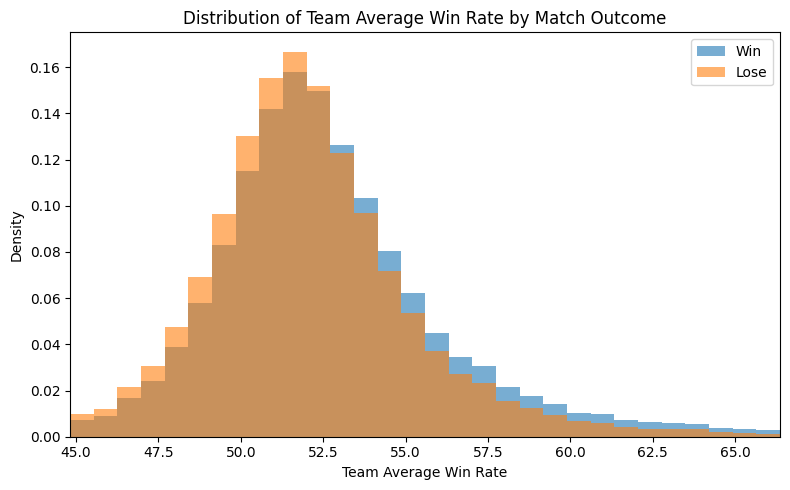

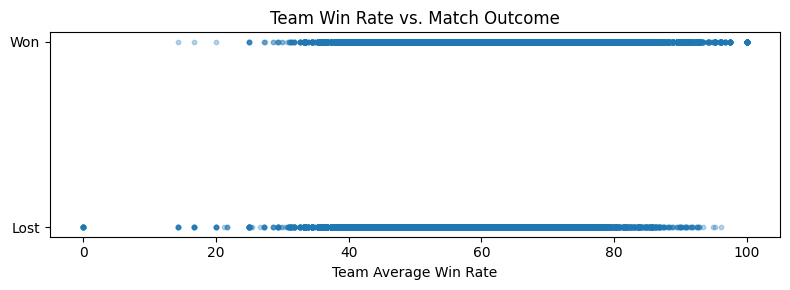

In [5]:
# 5. Density histograms: winning vs losing teams
win = df_team.loc[df_team.team_won==1, 'team_avg_win_rate']
lose = df_team.loc[df_team.team_won==0, 'team_avg_win_rate']

low, high = df_team.team_avg_win_rate.quantile([0.01,0.99])
plt.figure(figsize=(8,5))
plt.hist(win,  bins=30, density=True, alpha=0.6, label='Win',  range=(low,high))
plt.hist(lose, bins=30, density=True, alpha=0.6, label='Lose', range=(low,high))
plt.xlim(low, high)
plt.xlabel('Team Average Win Rate')
plt.ylabel('Density')
plt.title('Distribution of Team Average Win Rate by Match Outcome')
plt.legend()
plt.tight_layout()
plt.show()

# 6. Scatter: win rate vs outcome
plt.figure(figsize=(8,3))
plt.scatter(df_team.team_avg_win_rate, df_team.team_won,
            alpha=0.3, s=10)
plt.yticks([0,1], ['Lost','Won'])
plt.xlabel('Team Average Win Rate')
plt.title('Team Win Rate vs. Match Outcome')
plt.tight_layout()
plt.show()


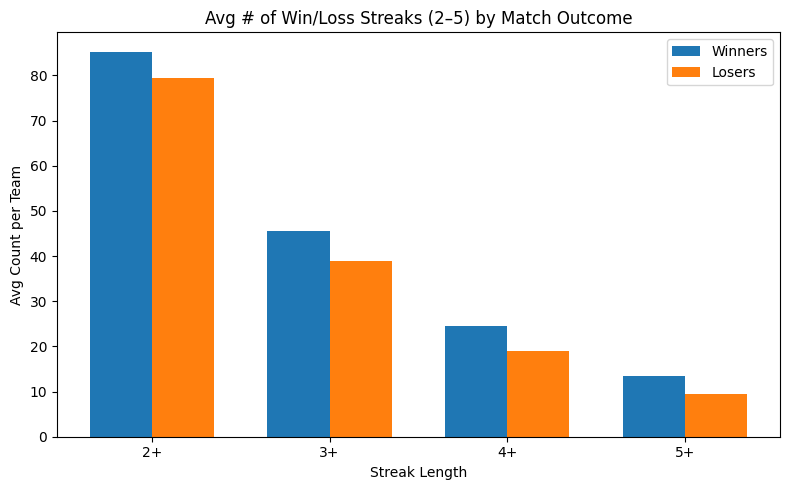

C:\Users\MWOfficeDesktop\AppData\Local\Temp\ipykernel_28668\1869236575.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([
C:\Users\MWOfficeDesktop\AppData\Local\Temp\ipykernel_28668\1869236575.py:66: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([


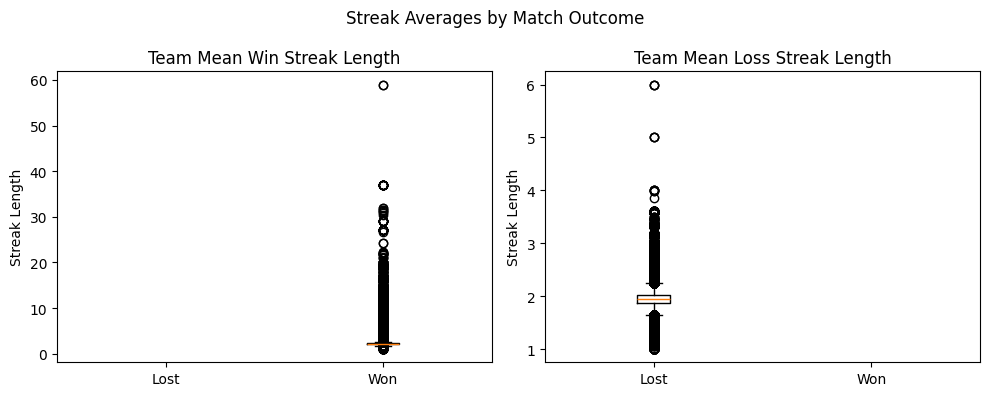

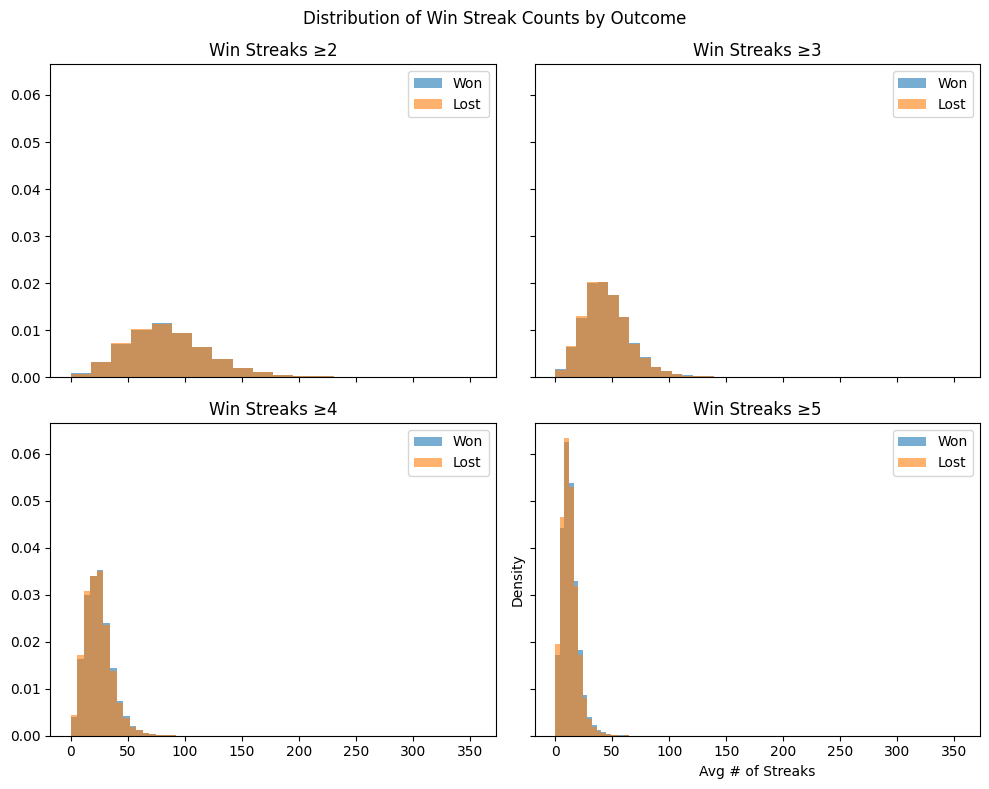

In [9]:
# 2. Load player overall win rates
df_trends = con.execute("""
    SELECT *
    FROM player_trends
""").df()

# 3. Load match history with team outcome flag
#    (replace table/name if different in your schema)
df_matches = con.execute("""
    SELECT *
    FROM player_matches_history
""").df()

df = df_matches.merge(df_trends, on='account_id', how='left')
df_team = (
    df
    .groupby(['match_id','team'], as_index=False)
    .agg(
        team_won               = ('won',            'max'),
        win_streaks_2plus      = ('win_streaks_2plus','mean'),
        win_streaks_3plus      = ('win_streaks_3plus','mean'),
        win_streaks_4plus      = ('win_streaks_4plus','mean'),
        win_streaks_5plus      = ('win_streaks_5plus','mean'),
        loss_streaks_2plus     = ('loss_streaks_2plus','mean'),
        loss_streaks_3plus     = ('loss_streaks_3plus','mean'),
        loss_streaks_4plus     = ('loss_streaks_4plus','mean'),
        loss_streaks_5plus     = ('loss_streaks_5plus','mean'),
        p_win_streak_avg       = ('p_win_streak_avg','mean'),
        p_loss_streak_avg      = ('p_loss_streak_avg','mean'),
    )
)
if df_team.empty:
    raise ValueError("No team‐level data found!")

# 3a. Bar chart: avg # of streaks (2–5) for winners vs losers
thresholds = ['2','3','4','5']
win_means  = [df_team.loc[df_team.team_won==1, f'win_streaks_{k}plus'].mean() for k in thresholds]
loss_means = [df_team.loc[df_team.team_won==0, f'loss_streaks_{k}plus'].mean() for k in thresholds]

x = np.arange(len(thresholds))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, win_means,  width, label='Winners')
ax.bar(x + width/2, loss_means, width, label='Losers')
ax.set_xticks(x)
ax.set_xticklabels([f'{k}+' for k in thresholds])
ax.set_xlabel('Streak Length')
ax.set_ylabel('Avg Count per Team')
ax.set_title('Avg # of Win/Loss Streaks (2–5) by Match Outcome')
ax.legend()
plt.tight_layout()
plt.show()

# 3b. Box plots: p_win_streak_avg & p_loss_streak_avg by outcome
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Win streak avg
axes[0].boxplot([
    df_team.loc[df_team.team_won==0, 'p_win_streak_avg'],
    df_team.loc[df_team.team_won==1, 'p_win_streak_avg']
], labels=['Lost','Won'])
axes[0].set_title('Team Mean Win Streak Length')

# Loss streak avg
axes[1].boxplot([
    df_team.loc[df_team.team_won==0, 'p_loss_streak_avg'],
    df_team.loc[df_team.team_won==1, 'p_loss_streak_avg']
], labels=['Lost','Won'])
axes[1].set_title('Team Mean Loss Streak Length')

for ax in axes:
    ax.set_ylabel('Streak Length')
plt.suptitle('Streak Averages by Match Outcome')
plt.tight_layout()
plt.show()

# 3c. Histograms: distribution of win_streaks_{k}plus for winners vs losers
fig, axes = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, k in zip(axes, thresholds):
    ax.hist(
        df_team.loc[df_team.team_won==1, f'win_streaks_{k}plus'],
        bins=20, density=True, alpha=0.6, label='Won'
    )
    ax.hist(
        df_team.loc[df_team.team_won==0, f'win_streaks_{k}plus'],
        bins=20, density=True, alpha=0.6, label='Lost'
    )
    ax.set_title(f'Win Streaks ≥{k}')
    ax.legend()

fig.suptitle('Distribution of Win Streak Counts by Outcome')
plt.xlabel('Avg # of Streaks')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

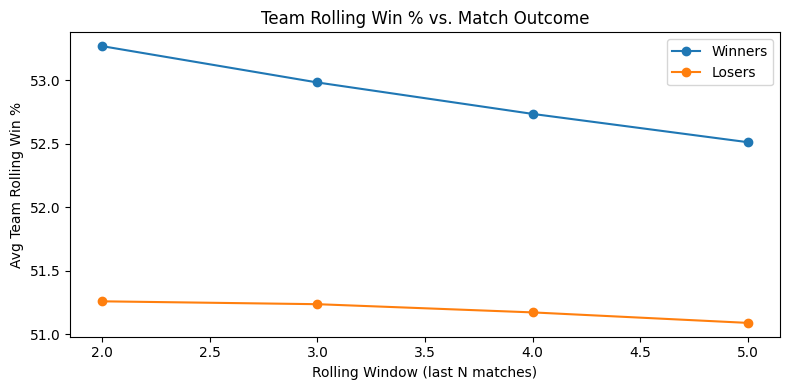

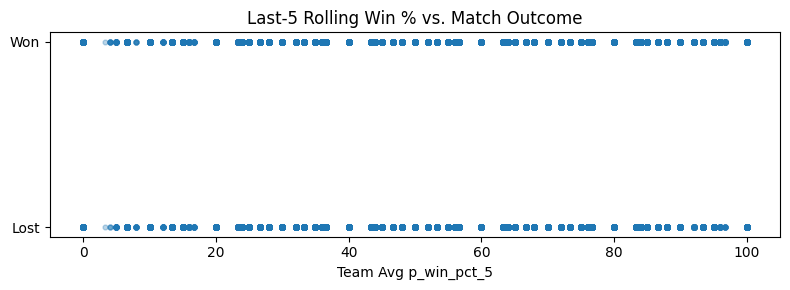

In [18]:
# 1. Pull p_win_pct_2–5 from player_trends via match history
df = con.execute("""
    SELECT
      pr.match_id,
      pm.team,
      pm.won,
      pr.p_win_pct_2,
      pr.p_win_pct_3,
      pr.p_win_pct_4,
      pr.p_win_pct_5
    FROM player_rolling_stats AS pr
    JOIN player_matches_history AS pm
      USING (account_id, match_id)
""").df()

# 2. Aggregate to team level
df_team = (
    df
    .groupby(['match_id','team'], as_index=False)
    .agg(
        team_w2 = ('p_win_pct_2','mean'),
        team_w3 = ('p_win_pct_3','mean'),
        team_w4 = ('p_win_pct_4','mean'),
        team_w5 = ('p_win_pct_5','mean'),
        team_won= ('won',       'max'),
    )
)

# 3a. Line plot of avg rolling win‐% (2→5) winners vs losers
windows = [2,3,4,5]
win_means  = [df_team.loc[df_team.team_won==1, f'team_w{n}'].mean() for n in windows]
lose_means = [df_team.loc[df_team.team_won==0, f'team_w{n}'].mean() for n in windows]

plt.figure(figsize=(8,4))
plt.plot(windows, win_means,  marker='o', label='Winners')
plt.plot(windows, lose_means, marker='o', label='Losers')
plt.xlabel('Rolling Window (last N matches)')
plt.ylabel('Avg Team Rolling Win %')
plt.title('Team Rolling Win % vs. Match Outcome')
plt.legend()
plt.tight_layout()
plt.show()

# 3b. Scatter of last‐5 window vs outcome
plt.figure(figsize=(8,3))
plt.scatter(df_team.team_w5, df_team.team_won, alpha=0.3, s=12)
plt.yticks([0,1], ['Lost','Won'])
plt.xlabel('Team Avg p_win_pct_5')
plt.title('Last-5 Rolling Win % vs. Match Outcome')
plt.tight_layout()
plt.show()


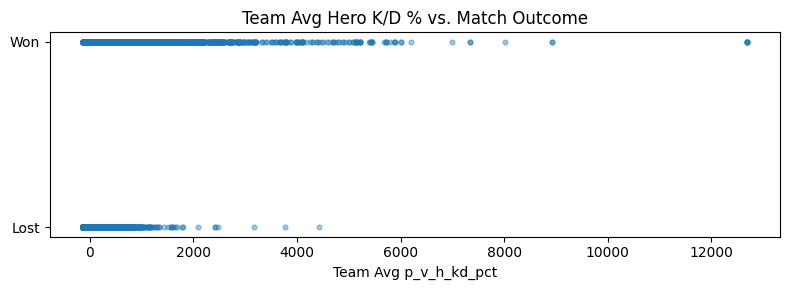

C:\Users\MWOfficeDesktop\AppData\Local\Temp\ipykernel_28668\19634957.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


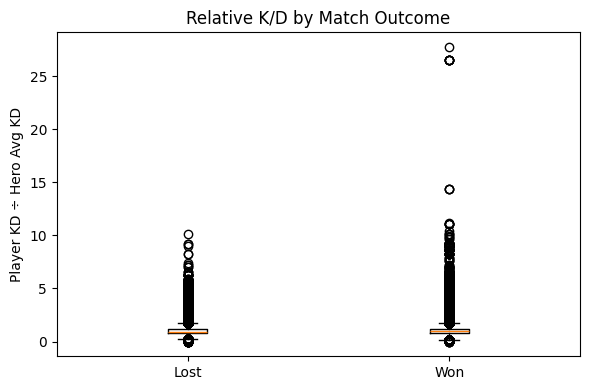

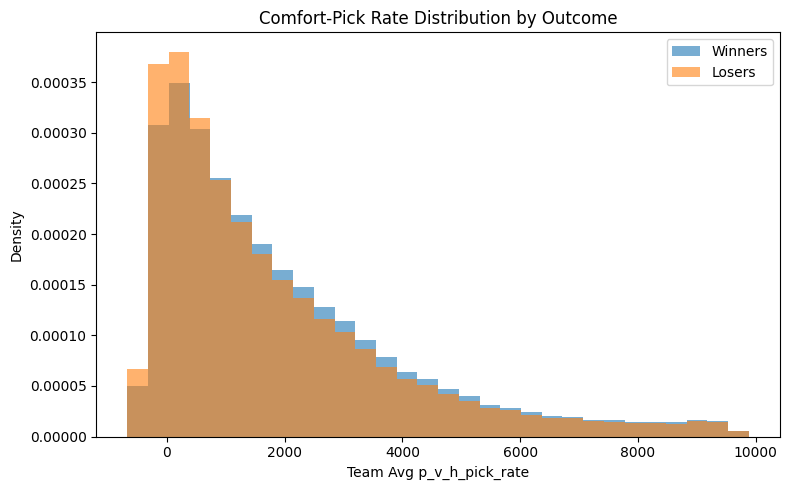

In [25]:
df_pr = con.execute("""
    SELECT account_id,
           match_id,
           hero_id,
           p_v_h_kd_pct,
           p_v_h_pick_rate
    FROM player_rolling_stats
""").df()

# Overall player trends (per player)
df_tr = con.execute("""
    SELECT account_id,
           p_avg_kd
    FROM player_trends
""").df()

# Match history giving team assignment & outcome
df_pm = con.execute("""
    SELECT match_id,
           account_id,
           team,
           won
    FROM player_matches_history
""").df()

# 2. Merge all three
df = (
    df_pr
    .merge(df_tr, on='account_id', how='left')       # brings in p_avg_kd
    .merge(df_pm, on=['account_id','match_id'], how='left')  # brings in team & won
)

# 3. Compute per-hero average KD and player-relative KD
hero_avg = (
    df
    .groupby('hero_id', as_index=False)['p_avg_kd']
    .mean()
    .rename(columns={'p_avg_kd':'hero_avg_kd'})
)
df = df.merge(hero_avg, on='hero_id', how='left')
df['relative_kd'] = df['p_avg_kd'] / df['hero_avg_kd']

# 4a. Scatter: team avg p_v_h_kd_pct vs. match outcome
df_team_kd = (
    df
    .groupby(['match_id','team'], as_index=False)
    .agg(
        team_kd_pct=('p_v_h_kd_pct','mean'),
        team_won   =('won',           'max')
    )
)
plt.figure(figsize=(8,3))
plt.scatter(df_team_kd.team_kd_pct, df_team_kd.team_won, alpha=0.4, s=12)
plt.yticks([0,1], ['Lost','Won'])
plt.xlabel('Team Avg p_v_h_kd_pct')
plt.title('Team Avg Hero K/D % vs. Match Outcome')
plt.tight_layout()
plt.show()

# 4b. Box plots: player-relative KD by outcome
plt.figure(figsize=(6,4))
plt.boxplot([
    df.loc[df.won==0, 'relative_kd'],
    df.loc[df.won==1, 'relative_kd']
], labels=['Lost','Won'])
plt.ylabel('Player KD ÷ Hero Avg KD')
plt.title('Relative K/D by Match Outcome')
plt.tight_layout()
plt.show()

# 4c. Histograms: team avg p_v_h_pick_rate by outcome
df_team_pr = (
    df
    .groupby(['match_id','team'], as_index=False)
    .agg(
        team_pick_rate=('p_v_h_pick_rate','mean'),
        team_won     =('won',                 'max')
    )
)
plt.figure(figsize=(8,5))
plt.hist(df_team_pr.loc[df_team_pr.team_won==1, 'team_pick_rate'],
         bins=30, density=True, alpha=0.6, label='Winners')
plt.hist(df_team_pr.loc[df_team_pr.team_won==0, 'team_pick_rate'],
         bins=30, density=True, alpha=0.6, label='Losers')
plt.xlabel('Team Avg p_v_h_pick_rate')
plt.ylabel('Density')
plt.title('Comfort-Pick Rate Distribution by Outcome')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\MWOfficeDesktop\AppData\Local\Temp\ipykernel_28668\52295773.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values   = [mean_hpr.get(0, 0), mean_hpr.get(1, 0)]


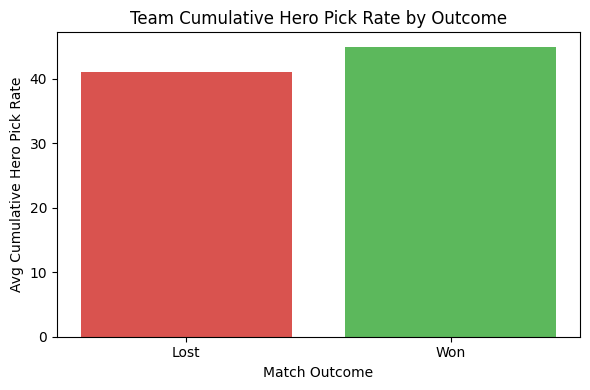

C:\Users\MWOfficeDesktop\AppData\Local\Temp\ipykernel_28668\52295773.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


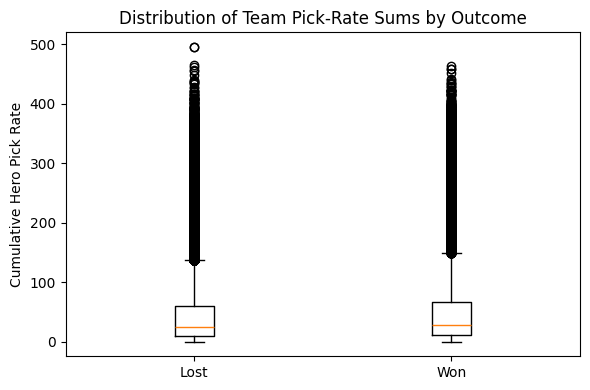

C:\Users\MWOfficeDesktop\AppData\Local\Temp\ipykernel_28668\52295773.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([


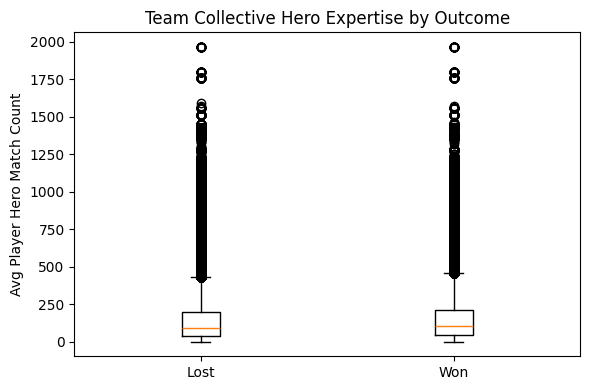

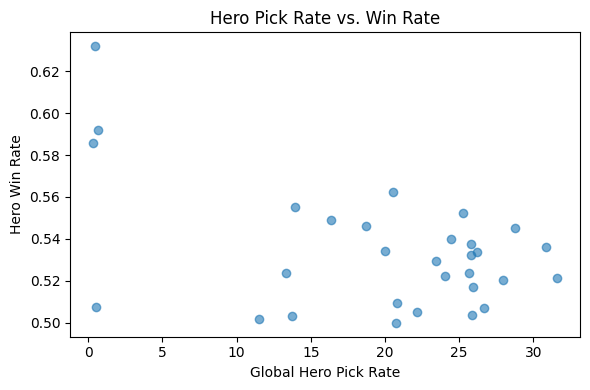

In [27]:
# 2. Load the two tables
df_pr = con.execute("""
    SELECT account_id,
           match_id,
           hero_id,
           p_h_match_count,
           hero_pick_rate
    FROM player_rolling_stats
""").df()

df_pm = con.execute("""
    SELECT match_id,
           account_id,
           team,
           won
    FROM player_matches_history
""").df()

# ————————————————————————————————————————————
# 7a Bar chart of each team’s cumulative hero_pick_rate vs outcome
# ————————————————————————————————————————————
# Compute sum of hero_pick_rate per team per match
df_team_hpr = (
    df
    .groupby(['match_id','team'], as_index=False)
    .agg(
        team_hpr_sum = ('hero_pick_rate','sum'),
        team_won     = ('won','max')
    )
)

# Compute average cumulative pick-rate for winners vs losers
mean_hpr = df_team_hpr.groupby('team_won')['team_hpr_sum'].mean()
outcomes = ['Lost','Won']
values   = [mean_hpr.get(0, 0), mean_hpr.get(1, 0)]

plt.figure(figsize=(6,4))
plt.bar(outcomes, values, color=['#d9534f','#5cb85c'])
plt.xlabel('Match Outcome')
plt.ylabel('Avg Cumulative Hero Pick Rate')
plt.title('Team Cumulative Hero Pick Rate by Outcome')
plt.tight_layout()
plt.show()

# Optional: show distribution with a box plot for more detail
plt.figure(figsize=(6,4))
plt.boxplot([
    df_team_hpr.loc[df_team_hpr.team_won==0, 'team_hpr_sum'],
    df_team_hpr.loc[df_team_hpr.team_won==1, 'team_hpr_sum']
], labels=outcomes)
plt.ylabel('Cumulative Hero Pick Rate')
plt.title('Distribution of Team Pick-Rate Sums by Outcome')
plt.tight_layout()
plt.show()

# ————————————————————————————————————————————
# 7b. Box-plot: Team collective hero expertise vs outcome
# ————————————————————————————————————————————
df_team_exp = (
    df
    .groupby(['match_id','team'], as_index=False)
    .agg(
        team_exp = ('p_h_match_count','mean'),
        team_won = ('won','max')
    )
)

fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot([
    df_team_exp.loc[df_team_exp.team_won==0, 'team_exp'],
    df_team_exp.loc[df_team_exp.team_won==1, 'team_exp']
], labels=['Lost','Won'])
ax.set_ylabel('Avg Player Hero Match Count')
ax.set_title('Team Collective Hero Expertise by Outcome')
plt.tight_layout()
plt.show()


# ————————————————————————————————————————————
# 7c. Scatter: Hero global pick-rate vs win-rate
# ————————————————————————————————————————————
hero_perf = (
    df
    .groupby('hero_id')
    .agg(
        appearances    = ('match_id','count'),
        wins           = ('won','sum'),
        hero_pick_rate = ('hero_pick_rate','mean')
    )
    .reset_index()
)

# filter out very rare heroes
hero_perf = hero_perf[hero_perf.appearances >= 10]
hero_perf['win_rate'] = hero_perf['wins'] / hero_perf['appearances']

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(hero_perf['hero_pick_rate'], hero_perf['win_rate'], alpha=0.6)
ax.set_xlabel('Global Hero Pick Rate')
ax.set_ylabel('Hero Win Rate')
ax.set_title('Hero Pick Rate vs. Win Rate')
plt.tight_layout()
plt.show()

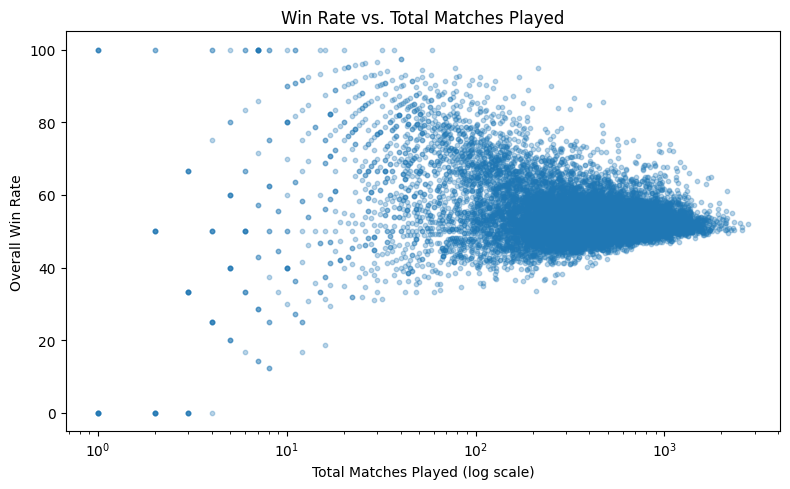

C:\Users\MWOfficeDesktop\AppData\Local\Temp\ipykernel_28668\4115192889.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('bin', as_index=False)['p_win_rate']


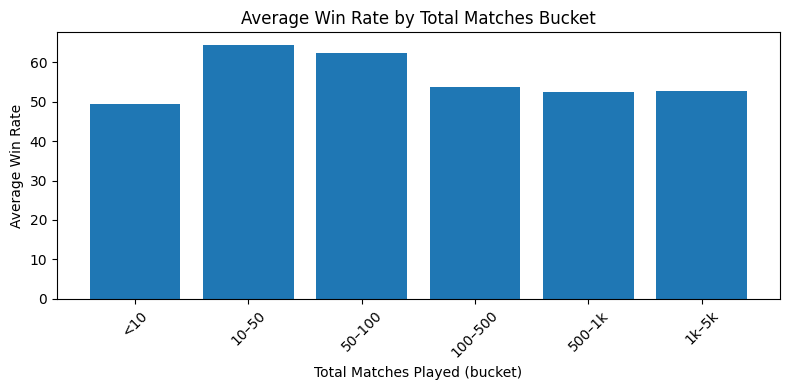

In [28]:
# 2. Load total match counts and win rates
df_trends = con.execute("""
    SELECT 
      p_total_matches,
      p_win_rate
    FROM player_trends
""").df()

# 3. Basic scatter: win rate vs. total matches
plt.figure(figsize=(8,5))
plt.scatter(df_trends.p_total_matches, df_trends.p_win_rate, 
            alpha=0.3, s=10)
plt.xscale('log')  # log scale helps spread out heavy tails
plt.xlabel('Total Matches Played (log scale)')
plt.ylabel('Overall Win Rate')
plt.title('Win Rate vs. Total Matches Played')
plt.tight_layout()
plt.show()

# 4. Aggregate into bins to see avg win rate by experience
bins  = [0,10,50,100,500,1000,5000,10000]
labels= ['<10','10–50','50–100','100–500','500–1k','1k–5k','>5k']
df_trends['bin'] = pd.cut(df_trends.p_total_matches, bins=bins, labels=labels, include_lowest=True)

df_summary = (
    df_trends
    .groupby('bin', as_index=False)['p_win_rate']
    .mean()
    .rename(columns={'p_win_rate':'avg_win_rate'})
)

plt.figure(figsize=(8,4))
plt.bar(df_summary.bin.astype(str), df_summary.avg_win_rate)
plt.xlabel('Total Matches Played (bucket)')
plt.ylabel('Average Win Rate')
plt.title('Average Win Rate by Total Matches Bucket')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

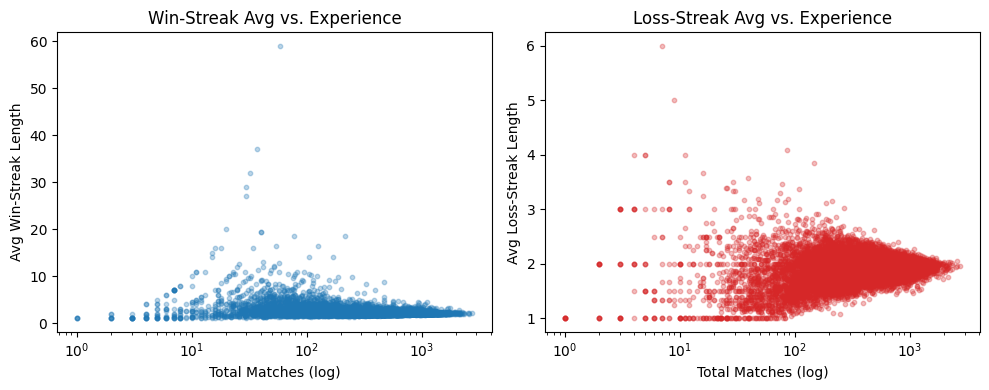

C:\Users\MWOfficeDesktop\AppData\Local\Temp\ipykernel_28668\3015236192.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('exp_bin')


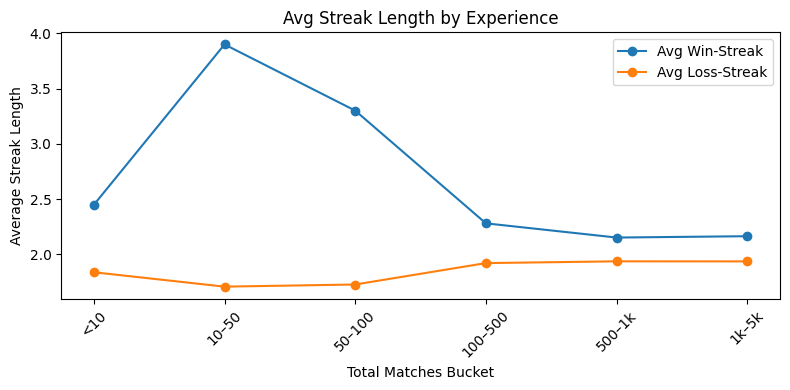

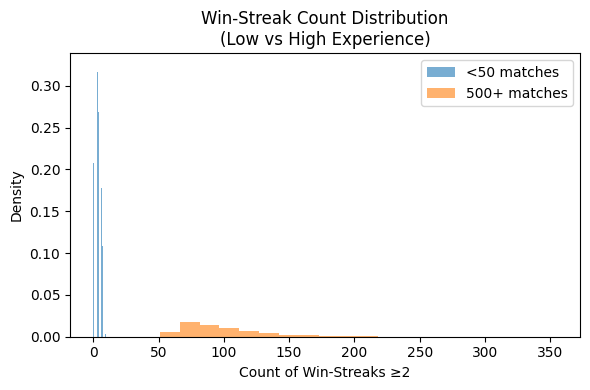

In [29]:
# 1. Connect to your DuckDB file and load streak + experience data
con = duckdb.connect('data/deadlock.db')
df = con.execute("""
    SELECT
      p_total_matches,
      p_win_rate,
      p_win_streak_avg,
      p_loss_streak_avg,
      win_streaks_2plus,
      win_streaks_3plus,
      win_streaks_4plus,
      win_streaks_5plus,
      loss_streaks_2plus,
      loss_streaks_3plus,
      loss_streaks_4plus,
      loss_streaks_5plus
    FROM player_trends
""").df()

# 2. Scatter: average win- and loss-streak length vs total matches
plt.figure(figsize=(10,4))

# win-streaks
plt.subplot(1,2,1)
plt.scatter(df.p_total_matches, df.p_win_streak_avg,
            alpha=0.3, s=10)
plt.xscale('log')
plt.xlabel('Total Matches (log)')
plt.ylabel('Avg Win-Streak Length')
plt.title('Win-Streak Avg vs. Experience')

# loss-streaks
plt.subplot(1,2,2)
plt.scatter(df.p_total_matches, df.p_loss_streak_avg,
            alpha=0.3, s=10, color='C3')
plt.xscale('log')
plt.xlabel('Total Matches (log)')
plt.ylabel('Avg Loss-Streak Length')
plt.title('Loss-Streak Avg vs. Experience')

plt.tight_layout()
plt.show()


# 3. Bin players by experience, compute mean streaks per bin
bins   = [0,10,50,100,500,1000,5000,10000]
labels = ['<10','10–50','50–100','100–500','500–1k','1k–5k','>5k']
df['exp_bin'] = pd.cut(df.p_total_matches, bins=bins, labels=labels, include_lowest=True)

summary = (
    df.groupby('exp_bin')
      [['p_win_streak_avg','p_loss_streak_avg']]
      .mean()
      .reset_index()
)

# 4. Line plot: how avg streak length evolves with experience
plt.figure(figsize=(8,4))
plt.plot(summary.exp_bin, summary.p_win_streak_avg, marker='o', label='Avg Win-Streak')
plt.plot(summary.exp_bin, summary.p_loss_streak_avg, marker='o', label='Avg Loss-Streak')
plt.xlabel('Total Matches Bucket')
plt.ylabel('Average Streak Length')
plt.title('Avg Streak Length by Experience')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# 5. Histograms: distribution of 2+ win-streak counts for low vs high experience
low  = df.loc[df.p_total_matches < 50, 'win_streaks_2plus']
high = df.loc[df.p_total_matches >= 500, 'win_streaks_2plus']

plt.figure(figsize=(6,4))
plt.hist(low,  bins=20, density=True, alpha=0.6, label='<50 matches')
plt.hist(high, bins=20, density=True, alpha=0.6, label='500+ matches')
plt.xlabel('Count of Win-Streaks ≥2')
plt.ylabel('Density')
plt.title('Win-Streak Count Distribution\n(Low vs High Experience)')
plt.legend()
plt.tight_layout()
plt.show()

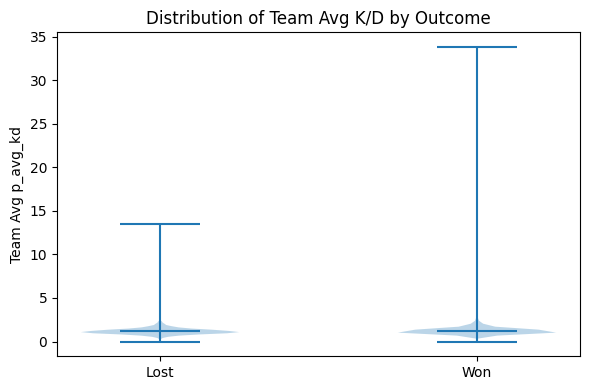

C:\Users\MWOfficeDesktop\AppData\Local\Temp\ipykernel_28668\3289917042.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([


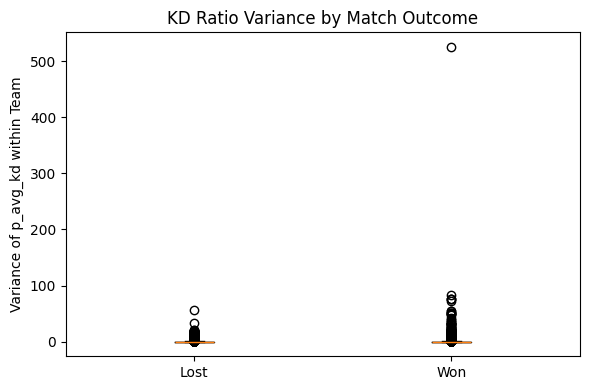

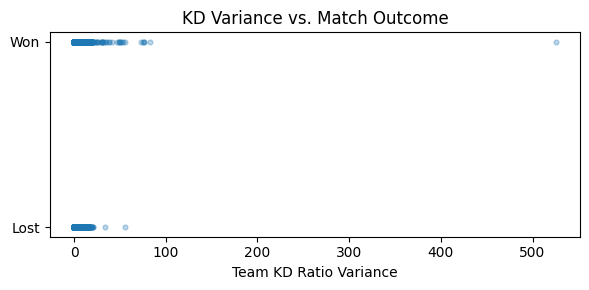

In [30]:
# 1. Connect and load tables
con = duckdb.connect('data/deadlock.db')

df_pr = con.execute("""
    SELECT account_id, match_id
    FROM player_rolling_stats
""").df()  # just to get match/account combos

df_tr = con.execute("""
    SELECT account_id, p_avg_kd
    FROM player_trends
""").df()

df_pm = con.execute("""
    SELECT match_id, account_id, team, won
    FROM player_matches_history
""").df()

# 2. Merge into one DataFrame with p_avg_kd and outcome
df = (
    df_pr
    .merge(df_tr, on='account_id', how='left')
    .merge(df_pm, on=['account_id','match_id'], how='left')
)

# 3. Team-level stats: average and variance of p_avg_kd
df_team = (
    df
    .groupby(['match_id','team'], as_index=False)
    .agg(
        team_avg_kd=('p_avg_kd','mean'),
        team_kd_var =('p_avg_kd','var'),
        team_won    =('won',       'max')
    )
)
df_team['team_kd_var'] = df_team['team_kd_var'].fillna(0)

# 4a. Violin plot: distribution of team_avg_kd by outcome
data_violin = [
    df_team.loc[df_team.team_won==0, 'team_avg_kd'],
    df_team.loc[df_team.team_won==1, 'team_avg_kd']
]

fig, ax = plt.subplots(figsize=(6,4))
ax.violinplot(data_violin, positions=[1,2], showmeans=True)
ax.set_xticks([1,2])
ax.set_xticklabels(['Lost','Won'])
ax.set_ylabel('Team Avg p_avg_kd')
ax.set_title('Distribution of Team Avg K/D by Outcome')
plt.tight_layout()
plt.show()

# 4b. Box plot: team_kd_var by outcome
fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot([
    df_team.loc[df_team.team_won==0, 'team_kd_var'],
    df_team.loc[df_team.team_won==1, 'team_kd_var']
], labels=['Lost','Won'])
ax.set_ylabel('Variance of p_avg_kd within Team')
ax.set_title('KD Ratio Variance by Match Outcome')
plt.tight_layout()
plt.show()

# 4c. Scatter: variance vs. outcome (optional)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(df_team.team_kd_var, df_team.team_won, alpha=0.3, s=12)
ax.set_yticks([0,1])
ax.set_yticklabels(['Lost','Won'])
ax.set_xlabel('Team KD Ratio Variance')
ax.set_title('KD Variance vs. Match Outcome')
plt.tight_layout()
plt.show()

In [17]:
df = con.execute("""
    SELECT
        account_id,
        hero_id,
        p_win_pct_2,
        p_win_pct_3,
        p_win_pct_4,
        p_win_pct_5,
        p_v_h_pick_rate,
        p_v_h_kd_pct,
        p_h_match_count,
        hero_pick_rate
    FROM player_rolling_stats
""").df()

In [18]:
df['avg_win_pct'] = df[
    ['p_win_pct_2','p_win_pct_3','p_win_pct_4','p_win_pct_5']
].mean(axis=1)

In [23]:
response = con.execute("""
        SELECT 
            *
        FROM player_rolling_stats
        LIMIT 25
        """).fetchdf()
print(response.head())

   account_id  hero_id  match_id          start_time  p_win_pct_2  \
0  1465196567       19  19919509 2024-10-03 17:16:37          0.0   
1  1465196567        7  20544206 2024-10-05 22:02:23         50.0   
2  1465196567        4  29386587 2024-11-29 08:32:02         50.0   
3  1465196567        4  29405925 2024-11-29 12:13:07          0.0   
4  1465196567        4  29421724 2024-11-29 16:28:38          0.0   

   p_win_pct_3  p_win_pct_4  p_win_pct_5  p_loss_pct_2  p_loss_pct_3  \
0     0.000000          0.0          0.0           0.0      0.000000   
1     0.000000          0.0          0.0          50.0      0.000000   
2    33.330002          0.0          0.0          50.0     66.669998   
3    33.330002         25.0          0.0         100.0     66.669998   
4     0.000000         25.0         40.0         100.0    100.000000   

   p_loss_pct_4  p_loss_pct_5 prior_win_loss_streak  p_v_h_pick_rate  \
0           0.0           0.0                     0           2523.0   
1       

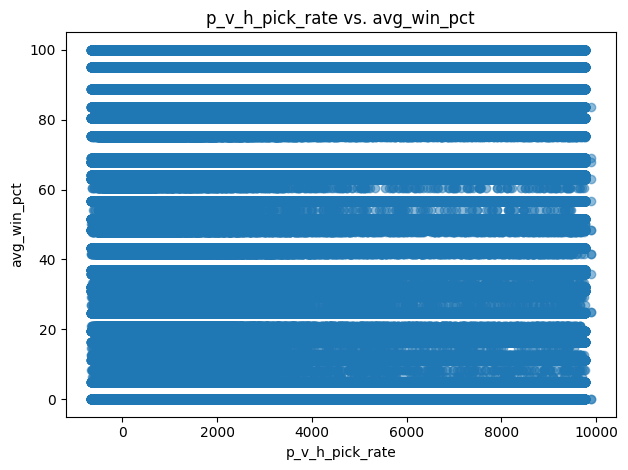

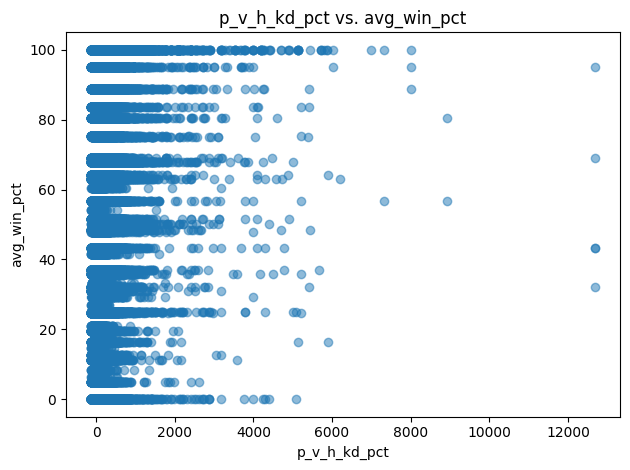

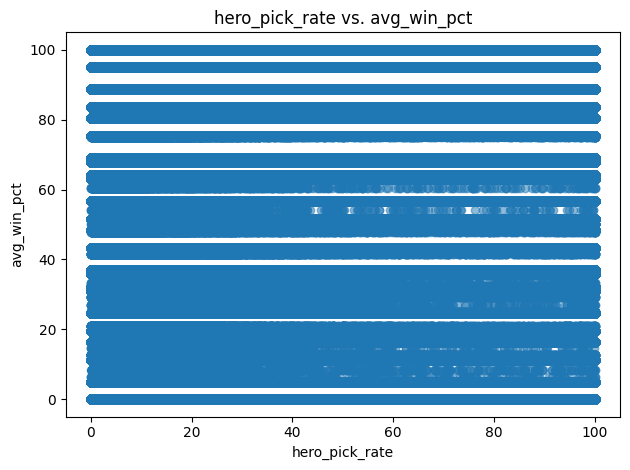

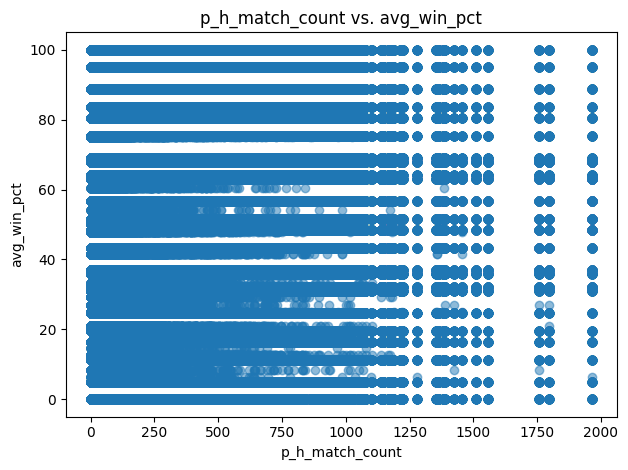

In [19]:
features = ['p_v_h_pick_rate','p_v_h_kd_pct','hero_pick_rate','p_h_match_count']

for feat in features:
    plt.figure()
    plt.scatter(df[feat], df['avg_win_pct'], alpha=0.5)
    plt.xlabel(feat)
    plt.ylabel('avg_win_pct')
    plt.title(f'{feat} vs. avg_win_pct')
    plt.tight_layout()
    plt.show()